In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('cardio_train(Bowen) - cardio_train.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
female=len(df[df['gender']==1])
female

45530

In [9]:
male=len(df[df['gender']==2])
male

24470

In [10]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

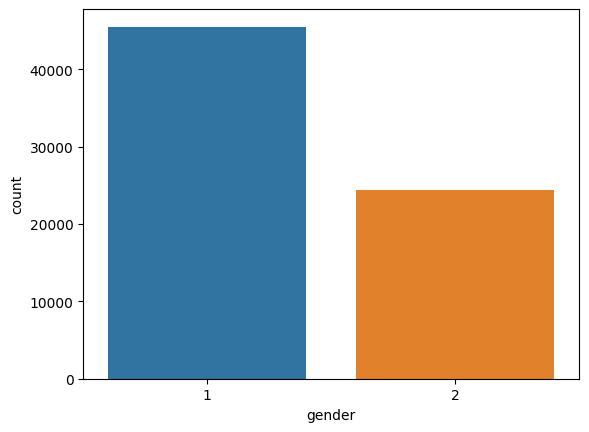

In [11]:
sns.countplot(x=df['gender'])

In [12]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [13]:
df.cardio.value_counts()


0    35021
1    34979
Name: cardio, dtype: int64

In [14]:
df.corr()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [15]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [16]:
def convert_days_to_year(obj):
    for i in str(obj):
        i=obj/365
    return i
    

In [17]:
convert_days_to_year(18393)

50.391780821917806

In [18]:
df['age']=df['age'].apply(convert_days_to_year)

In [19]:
df.age

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

<Axes: xlabel='smoke', ylabel='count'>

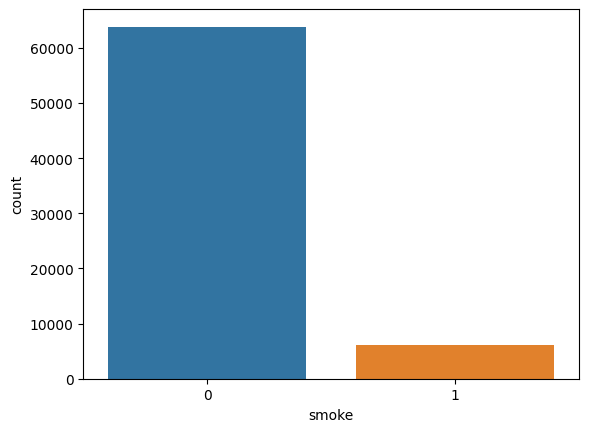

In [20]:
sns.countplot(x=df['smoke'])

In [21]:
df['gender']=df['gender'].astype('int')


In [22]:
df['gender']

0        2
1        1
2        1
3        2
4        1
        ..
69995    2
69996    1
69997    2
69998    1
69999    1
Name: gender, Length: 70000, dtype: int32

<Axes: xlabel='active', ylabel='count'>

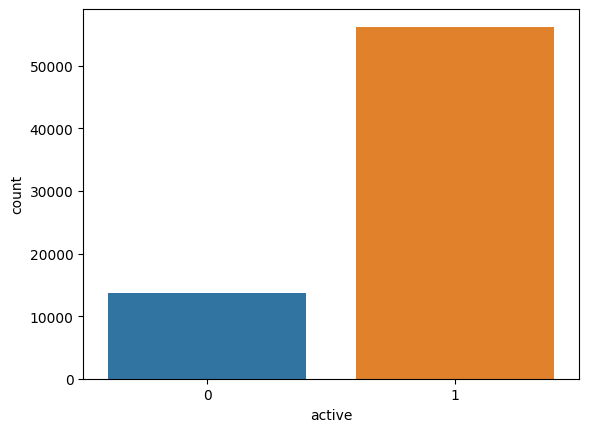

In [23]:
sns.countplot(x=df['active'])

In [24]:
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

In [25]:
df = df.drop(['id'],axis=1)


In [26]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


In [27]:
df[['weight','cholesterol']].corr()

,weight,cholesterol
weight,1.000000,0.141768
cholesterol,0.141768,1.000000


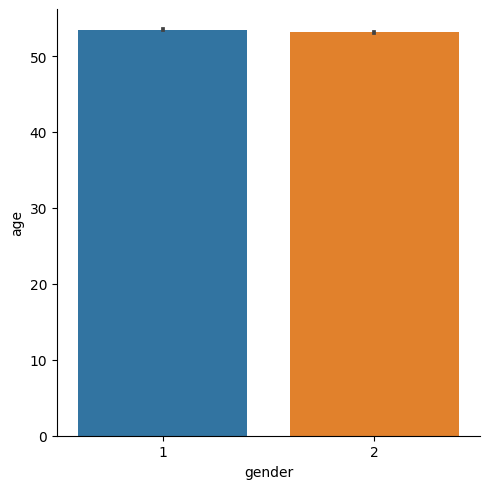

In [28]:
sns.catplot(x='gender',y='age',data=df,kind='bar')

In [29]:
df['HEight']=df['height']/100

In [30]:
df['BMI']=df['weight']/(df['HEight']*df['HEight'])

In [31]:
df['BMI']


0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: BMI, Length: 70000, dtype: float64

In [32]:
df.drop(columns="HEight",inplace=True)

In [33]:
df['BMI']=df['BMI'].astype(int)


In [34]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27


<Axes: >

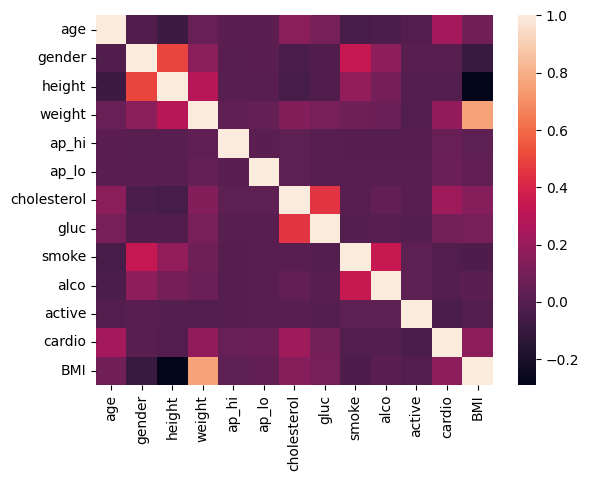

In [35]:
sns.heatmap(data=df.corr())

## Data analysis 

In [36]:
print(f'In dataset: {round(((len(df[(df.gender== 1 )]) / len(df.gender))*100), 2)} % women \
и {round(((len(df[(df.gender== 2 )]) / len(df.gender))*100), 2)} % men')

In dataset: 65.04 % women и 34.96 % men


In [37]:
print(f'Total percentage of disease: {round(((len(df[(df.cardio== 1 )]) / len(df.cardio))*100), 2)} %')
print(f'Disease among women: {round(((len(df[(df.cardio== 1 ) & (df.gender== 1 )]) / len(df[(df.gender== 1 )]))*100), 2)} %')
print(f'Disease among men: {round(((len(df[(df.cardio== 1 ) & (df.gender== 2 )]) / len(df[(df.gender== 2 )]))*100), 2)} %')

Total percentage of disease: 49.97 %
Disease among women: 49.67 %
Disease among men: 50.52 %


In [38]:
df.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
cardio,,,,,,,,,,,,
0,51.730476,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881,26.057251
1,54.950173,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559,28.073501


In [39]:
df.loc[(df.age < 45), 'age_group'] = '1_young'
df.loc[((df.age< 60) & (df.age >= 45)), 'age_group'] = '2_average'
df.loc[(df.age>= 60), 'age_group'] = '3_elderly'

In [40]:
df[(df.cardio == 0 )].groupby('age_group').mean()   

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
age_group,,,,,,,,,,,,,
1_young,41.839119,1.367517,165.119318,70.246494,115.610449,81.482955,1.125277,1.110865,0.107677,0.062639,0.812777,0.0,25.342572
2_average,52.869939,1.332355,164.380016,71.799400,120.631303,84.291374,1.225201,1.179837,0.090642,0.055364,0.819609,0.0,26.153241
3_elderly,62.088070,1.382025,163.694148,72.716187,127.429169,88.675569,1.322109,1.259173,0.077334,0.043660,0.817000,0.0,26.731073


C:\Users\ibuku\AppData\Local\Temp\ipykernel_12064\2745092850.py:1: MatplotlibDeprecationWarning: The matplotlib.fontconfig_pattern module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.fontconfig_pattern import FontconfigPatternParser


<Axes: title={'center': 'Distribution by age groups'}, ylabel='age_group'>

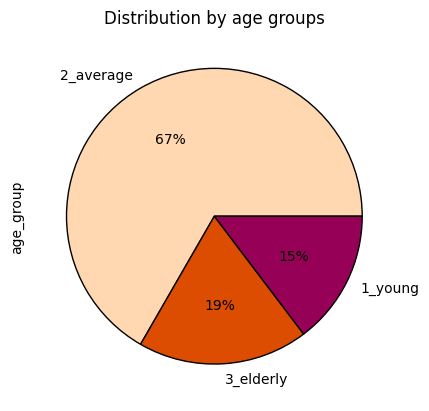

In [41]:
from matplotlib.fontconfig_pattern import FontconfigPatternParser
pie_data = df['age_group'].value_counts()
pie_data.plot(kind='pie', title='Distribution by age groups', 
              autopct='%1.0f%%', y = "age group",
              colors = ['#ffd8b1', '#dc4d01', '#960056'], 
              wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

In [42]:
df_ratings_counts = pd.pivot_table(df,   
               index=["age_group"],
               values=["cardio"],
               aggfunc=[sum, len])
df_ratings_counts['cardio_percentage'] = (df_ratings_counts['sum'] / df_ratings_counts['len'])*100
df_ratings_counts.style.bar(align='zero', color='#dc4d01')

,sum,len,cardio_percentage
,cardio,cardio,
age_group,,,
1_young,3056,10272,29.750779
2_average,23179,46678,49.657226
3_elderly,8744,13050,67.003831


C:\Users\ibuku\AppData\Local\Temp\ipykernel_12064\1675639217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
C:\Users\ibuku\AppData\Local\Temp\ipykernel_12064\1675639217.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=matrix, xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='rocket',


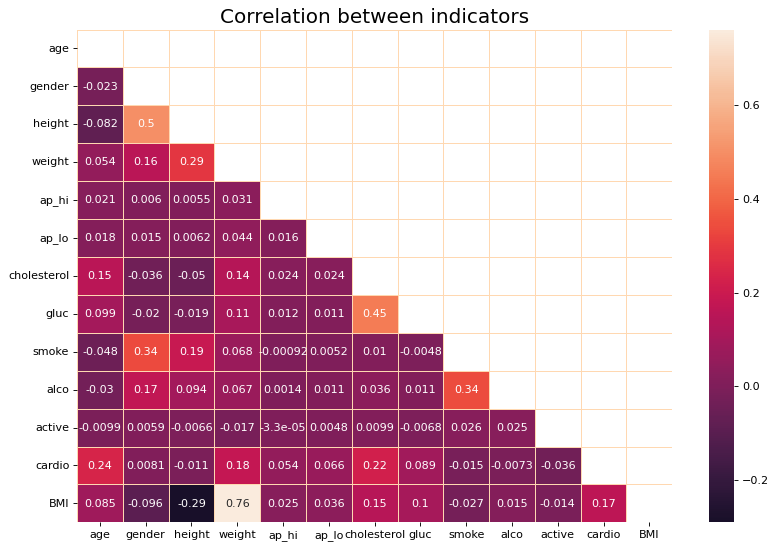

In [43]:
plt.figure(figsize=(12,8), dpi= 80)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), mask=matrix, xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='rocket',
             center=0.2, linewidths=0.5, linecolor='#ffd8b1', annot=True)

plt.title('Correlation between indicators', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [44]:
df_cardio_counts = pd.pivot_table(df,   
               index=["ap_hi"],
               values=["cardio"],
               aggfunc=[sum, len])
df_cardio_counts['cardio_percentage'] = round((df_cardio_counts['sum'] / df_cardio_counts['len'])*100, 2)

Text(0.0, 1.0, 'Upper blood pressure and percentage of cardio')

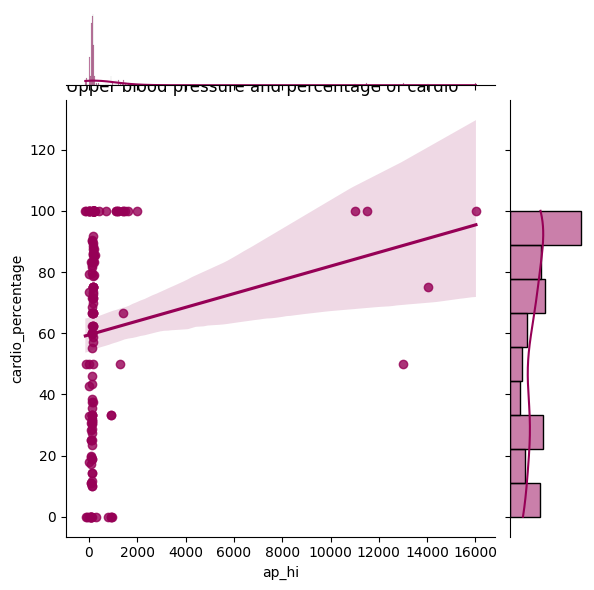

In [45]:
sns.jointplot(data=df_cardio_counts, x="ap_hi", y="cardio_percentage", kind="reg", color='#960056')
plt.title('Upper blood pressure and percentage of cardio', loc = 'left')

In [46]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_group
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21,2_average
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34,2_average
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23,2_average
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28,2_average
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23,2_average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26,2_average
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50,3_elderly
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31,2_average
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27,3_elderly


In [47]:
X = df.drop(["cardio",'BMI','age_group'],axis=1).values
y = df["cardio"].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
from sklearn.metrics import accuracy_score,confusion_matrix


In [52]:
LOG_model=LogisticRegression()
LOG_model.fit(X_train,y_train)
y_pred_train_LOG=LOG_model.predict(X_train)
train_accuracy_LOG=accuracy_score(y_train,y_pred_train_LOG)
print('train_accuracy in LOG',train_accuracy_LOG)
print('==================================================')
y_pred_LOG=LOG_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_LOG)
print(' test accuracy of LOG',accuracy)
print('==================================================')


train_accuracy in LOG 0.7084
 test accuracy of LOG 0.7122285714285714


C:\Users\ibuku\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
SVM= SVC()
SVM.fit(X_train,y_train)
y_pred_train_SVM=SVM.predict(X_train)
train_accuracy_SVM=accuracy_score(y_train,y_pred_train_SVM)
print('train_accuracy in LOG',train_accuracy_LOG)
print('==================================================')
y_pred=SVM.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('test accuracy of SVM',accuracy)
print('==================================================')


train_accuracy in LOG 0.7084
test accuracy of SVM 0.7201714285714286


In [54]:
from sklearn.tree import DecisionTreeClassifier
## making using of Decision tree 
DTC_model=DecisionTreeClassifier()
DTC_model.fit(X_train,y_train)
##training the dataset
y_pred_train_DTC=DTC_model.predict(X_train)
train_accuracy_DTC=accuracy_score(y_train,y_pred_train_DTC)
print('train_accuracy in DTC',train_accuracy_DTC)
print('==================================================')
## testing the model
y_pred_test_DTC=DTC_model.predict(X_test)
test_accuracy_DTC=accuracy_score(y_test,y_pred_test_DTC)
print(' test accuracy in DTC',test_accuracy_DTC)
print('===============================================')

train_accuracy in DTC 0.9997904761904762
 test accuracy in DTC 0.6325714285714286


In [55]:

RFC_model=RandomForestClassifier()
RFC_model.fit(X_train,y_train)
##training the dataset
y_pred_train_RFC=RFC_model.predict(X_train)
train_accuracy_RFC=accuracy_score(y_train,y_pred_train_RFC)
print('train_accuracy in RFC',train_accuracy_RFC)
print('==================================================')
## testing the model
y_pred_test_RFC=RFC_model.predict(X_test)
test_accuracy_RFC=accuracy_score(y_test,y_pred_test_RFC)
print('test accuracy in RFC',test_accuracy_RFC)
print('===============================================')

train_accuracy in RFC 0.9997714285714285
test accuracy in RFC 0.7164


In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

confusion_matrix_LOG=confusion_matrix(y_test,y_pred_LOG)
confusion_matrix_svm=confusion_matrix(y_test,y_pred)
confusion_matrix_DTC=confusion_matrix(y_test,y_pred_test_DTC)
confusion_matrix_RFC=confusion_matrix(y_test,y_pred_test_RFC)
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,classification_report 
from sklearn.metrics import roc_auc_score as roc

print('LOGISTIC REGRESSION')
print(confusion_matrix_LOG)
print('=========================================================')
print('support vector machine')
print(confusion_matrix_svm)
print('=========================================================')
print('decision tree')
print(confusion_matrix_DTC)
print('=========================================================')
print('random forest')
print(confusion_matrix_RFC)
print('=========================================================')

LOGISTIC REGRESSION
[[6695 2107]
 [2929 5769]]
support vector machine
[[7241 1561]
 [3336 5362]]
decision tree
[[5618 3184]
 [3246 5452]]
random forest
[[6498 2304]
 [2659 6039]]


In [58]:
from sklearn.metrics import roc_auc_score as roc 

In [59]:

print(f'classification report of LOG')
print(classification_report(y_pred_LOG,y_test))
LOG2=LOG_model.predict(X_train)
print('roc auc score for LOG',roc(y_train,LOG2))
print('======================================================')
print(f'classification report of support vector machine')
print(classification_report(y_pred,y_test))
SVM=SVM.predict(X_train)
print('roc auc score for LOG',roc(y_train,SVM))
print('===================================================')
print(f'classification report of DTC')
print(classification_report(y_pred_test_DTC,y_test))
DTC2=DTC_model.predict(X_train)
print('roc auc score for LOG',roc(y_train,DTC2))
print('======================================================')
print(f'classification report of RFC')
print(classification_report(y_pred_test_RFC,y_test))
RFC2=RFC_model.predict(X_train)
print('roc auc score for LOG',roc(y_train,RFC2))
print('===================================================')

classification report of LOG
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      9624
           1       0.66      0.73      0.70      7876

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.72      0.71      0.71     17500

roc auc score for LOG 0.7084455493023823
classification report of support vector machine
              precision    recall  f1-score   support

           0       0.82      0.68      0.75     10577
           1       0.62      0.77      0.69      6923

    accuracy                           0.72     17500
   macro avg       0.72      0.73      0.72     17500
weighted avg       0.74      0.72      0.72     17500

roc auc score for LOG 0.7201880019601558
classification report of DTC
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      8864
           1       0.63      0.63      0.63      